<a href="https://colab.research.google.com/github/englishmuffins10/Homework/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Excercise 5.4: Page 148 (Suggested vmax = .005)

a) Python Function J(m,x) that calculates the value of Jm(x) using Simpson's rule with N=1000 points:

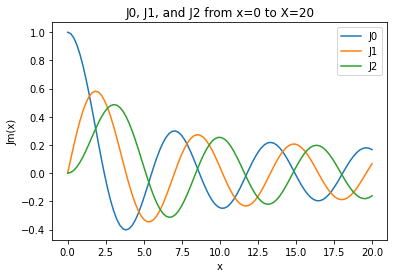

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Function for which the integral must be gotten to get J(m,x)
# Takes m, x, and var(theta) as variables.
# Returns a numerical value
def f(m,x,var):
  return np.cos( (m*var) -(x*np.sin(var)) )

# Function that gets the simpsons rule approximation for Jm
# Takes m and x as variables
# Returns a numerical value
def J(m,x):
  N = 1000
  a = 0
  b = np.pi
  h = (b-a) / N

  sum1 = 0
  for k in range(1,N,2):
    sum1 += f(m,x,a+(k*h))

  sum2 = 0
  for k in range(2,N,2):
    sum2 += f(m,x,a+(k*h))

  Tsum = f(m,x,a) + f(m,x,b)
  Tsum += 4 * sum1
  Tsum += 2 * sum2
  return Tsum * h / (3*np.pi)

# Function that fills an array of type Jm with its values
# Takes m, xArr (array of x values), and the zeroed Jm array
# Returns a filled Jm array
def fillJm(m,xArr,Jm):  
  count = 0
  for x in xArr:
    Jm[count] = J(m,x)
    count += 1
  return Jm

# Define xArr and zeroed out Jo, J1, and J2 arrays
xArr = np.linspace(0,20,100)
J0 = np.zeros(len(xArr))
J1 = np.zeros(len(xArr))
J2 = np.zeros(len(xArr))

# Fill J0, J1, and J2 with their values
J0 = fillJm(0,xArr,J0)
J1 = fillJm(1,xArr,J1)
J2 = fillJm(2,xArr,J2)

# Plot the result
plt.plot(xArr,J0, label = "J0")
plt.plot(xArr,J1, label = "J1")
plt.plot(xArr,J2, label = "J2")
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("Jm(x)")
plt.title("J0, J1, and J2 from x=0 to X=20")
plt.show()

b) Second program that makes a density plot of the intensity of the circular diffraction pattern of a point light source  with lamda = 500nm:

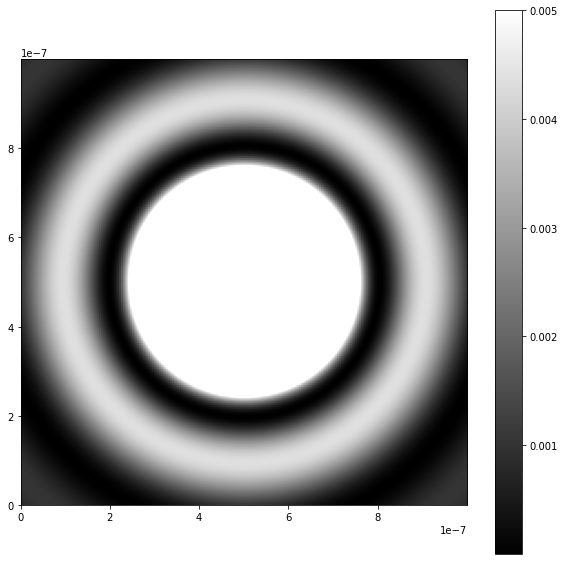

In [ ]:
import numpy as np
import pylab as pl

# Function for which the integral must be gotten to get J(m,x)
# Takes m, x, and var(theta) as variables.
# Returns a numerical value
def f(m,x,var):
  return np.cos( (m*var) -(x*np.sin(var)) )

# Function that gets the simpsons rule approximation for Jm
# Takes m and x as variables
# Returns a numerical value
def J(m,x):
  N = 100
  a = 0
  b = np.pi
  h = (b-a) / N

  sum1 = 0
  for k in range(1,N,2):
    sum1 += f(m,x,a+(k*h))

  sum2 = 0
  for k in range(2,N,2):
    sum2 += f(m,x,a+(k*h))

  Tsum = f(m,x,a) + f(m,x,b)
  Tsum += 4 * sum1
  Tsum += 2 * sum2
  return Tsum * h / (3*np.pi)

# Constants needed for the problem
lamda = np.float32(500e-9)
k = (2*np.pi) / lamda
M = 200
L = np.float32(1e-6)
d = L / M
xc = L/2
yc = L/2

# Function that gets the intensity of a point
# Takes the radius as a variable
# Returns a numerical value
def getI(r):
  if (k*r) == 0:
    return (.5)**2
  else:
    j = J(1,(k*r))
    return ( j/(k*r) )**2

# Define the array I that will store all of the intesity values
I = np.zeros([M+1,M+1],float)

# Fill I with its values
for i in range(M+1):
  y = i*d
  for j in range(M+1):
    x = j*d

    r = np.sqrt((x-xc)**2+(y-yc)**2)
    I[i,j] = getI(r)

# Plot I
pl.figure(figsize=(10,10))
pl.imshow(I,cmap=pl.cm.gray,vmax=.005,extent=[0,L,0,L])
pl.colorbar()
pl.show()

Exercise 5.10: Page 173

Solving E for T:

![picture](https://drive.google.com/uc?export=view&id=1QgBvjJiMVLUn45flKn9pJZO6iIY6eYJi)




b) Python Function that calculates the period of the oscillator for a given amplitude:

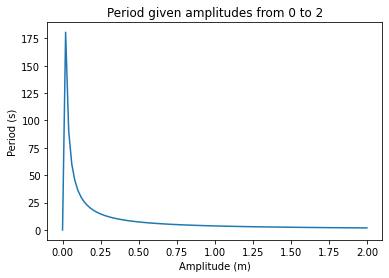

In [ ]:
import numpy as np
import math as ma
from matplotlib import pyplot as plt

# Function that gets the integration points and weights
# Takes N as a variable
# Returns x and w as numerical values
# From the textbook online resource
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

# Function that gets the integration points and weights for the integral from a to b
# Takes N, a, and b as variables
# Returns x and w as numerical values
# From the textbook online resource
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Function that gets the integral approximation of a function
# Takes N, a, b, and f as variables
# Returns a numerical value
# Code by Mark Newman, edited slighty for a function that takes two variables (x, b)
def integrateGauss(N,a,b,f):
    integral = 0.0
    ## get the sample points and optimal weights
    x,w = gaussxwab(N,a,b)

    # Now we use these in the integration
    for k in range(N):
      integral = integral+w[k]*f(x[k],b)
    return integral

# Function that the integration is found for
# Takes x and A as variables
# Returns a numerical value
def f(x,A):
  V = ma.pow(A,4) - ma.pow(x,4)
  if V == 0:
    return 0
  else:
    return ma.pow(V,-1/2)

# Function that gets the period using the integration approximation
# Takes N, a, b, and m as variables
# Returns a numerical value
def getT(N, a, b, m):
  integration = integrateGauss(N,a,b,f)
  return np.sqrt(8*m) * integration

# Starting constants and arrays for plotting data
N = 20
a = 0.0
b = np.linspace(0,2,100)
T = np.zeros(len(b))
m = 1

# Get the period (T) for every value in b (amplitudes)
count = 0
for Amp in b:
  T[count] = getT(N, a, Amp, m)
  count +=1

# Plot the result
plt.plot(b,T)
plt.xlabel("Amplitude (m)")
plt.ylabel("Period (s)")
plt.title("Period given amplitudes from 0 to 2")
plt.show()

c) Explanation of results:

Because of the odd shape formed by the potential energy equation, the particle starts with more energy than if it had been in a harmonic state when its amplitude is large (Amplitude > 1). Because of the ever increasing energy it starts with as its amplitude increases it is traveling much faster through its cycle. On the other hand, when the amplitude is low (Amplitude < 1) it will have much less energy that if it had been in a harmonic state, decreasing its speed and increasing the time it takes to complete a cycle. Also, when the amplitude is 0, it starts with 0 potential energy, and so does not oscilate. 




Exercise 5.11: Page 174 (Plot z=1, z=3, and z=6 on the same axis)

A program that calculates I/I0 and makes a plot of it:

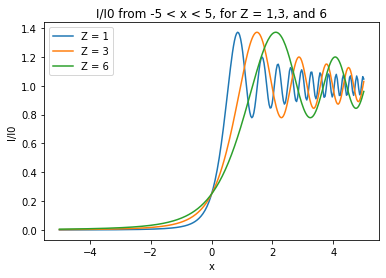

In [ ]:
import numpy as np
import math as ma
from matplotlib import pyplot as plt

# Function that gets the integration points and weights
# Takes N as a variable
# Returns x and w as numerical values
# From the textbook online resource
def gaussxw(N):

    # Initial approximation to roots of the Legendre polynomial
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    x = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Find roots using Newton's method
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(x)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*x*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-x*p1)/(1-x*x)
        dx = p1/dp
        x -= dx
        delta = max(abs(dx))

    # Calculate the weights
    w = 2*(N+1)*(N+1)/(N*N*(1-x*x)*dp*dp)

    return x,w

# Function that gets the integration points and weights for the integral from a to b
# Takes N, a, and b as variables
# Returns x and w as numerical values
# From the textbook online resource
def gaussxwab(N,a,b):
    x,w = gaussxw(N)
    return 0.5*(b-a)*x+0.5*(b+a),0.5*(b-a)*w

# Function that gets the integral approximation of a function
# Takes N, a, b, and f as variables
# Returns a numerical value
# Code by Mark Newman
def integrateGauss(N,a,b,f):
    integral = 0.0
    ## get the sample points and optimal weights
    x,w = gaussxwab(N,a,b)

    # Now we use these in the integration
    for k in range(N):
      integral = integral+w[k]*f(x[k])
    return integral

# Function that needs to be integrated for C(u)
# Takes t as a variable
# Returns a numerical value
def c(t):
  return np.cos( .5 * np.pi * (t**2) )

# Function that needs to be integrated for S(u)
# Takes t as a variable
# Returns a numerical value
def s(t):
  return np.sin( .5 * np.pi * (t**2) )

# Function that gets C(u) where u = b
# Takes N, a, and b as variables
# Returns a numerical value
def getC(N, a, b):
  return integrateGauss(N,a,b,c)

# Function that gets S(u) where u = b
# Takes N, a, and b as variables
# Returns a numerical value
def getS(N, a, b):
  return integrateGauss(N,a,b,s)

# Function that takes a empty array uArr, and fills it with its values
# Takes uArr, xArr, z, and lamda as values
# Returns a filled array
def filluArr(uArr, xArr,z,lamda):
  count = 0
  for x in xArr:
    uArr[count] = x*np.sqrt( 2/(lamda*z) )
    count +=1
  return uArr

# Function that takes a empty array II0, and fills it with its values
# Takes uArr, II0, N, and a as values
# Returns a filled array
def fillII0(uArr, II0, N, a):
  count = 0
  for u in uArr:
    C = getC(N, a, u)
    S = getS(N, a, u)

    II0[count] = (1/8)*( ( (2*C) + 1 )**2 + ( (2*S) + 1 )**2 )
    count += 1
  return II0

# Starting constants and arrays for plotting data
N = 50
a = 0.0
xArr = np.linspace(-5,5, 300)
z1 = 1
z3 = 3
z6 = 6
lamda = 1
uArr1 = np.zeros(len(xArr))
uArr3 = np.zeros(len(xArr))
uArr6 = np.zeros(len(xArr))
II01 = np.zeros(len(xArr))
II03 = np.zeros(len(xArr))
II06 = np.zeros(len(xArr))

# Fill uArr's
uArr1 = filluArr(uArr1, xArr, z1, lamda)
uArr3 = filluArr(uArr3, xArr, z3, lamda)
uArr6 = filluArr(uArr6, xArr, z6, lamda)

# Fill II0 arrays
II01 = fillII0(uArr1, II01, N, a)
II03 = fillII0(uArr3, II03, N, a)
II06 = fillII0(uArr6, II06, N, a)

# Plot the result
plt.plot(xArr,II01, label = "Z = 1")
plt.plot(xArr,II03, label = "Z = 3")
plt.plot(xArr,II06, label = "Z = 6")
plt.legend(loc="upper left")
plt.xlabel("x")
plt.ylabel("I/I0")
plt.title("I/I0 from -5 < x < 5, for Z = 1,3, and 6")
plt.show()

Explanation of results:
For x < 0 there is a smooth, increasing curve since there has been no diffraction before x = 0. After this point however there is a significant amount  of diffraction after passing the wall that fluctuates with respect to x. 
It seems that the farther out from the wall in the z-axis that these fluctuations are measured, the larger the amplitude and wavelength of said fluctuations. These fluctuations also seem to be more pronounced the closer to the wall in the x-axis they are measured. 



